In [1]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../codes')

In [4]:
from VMSfunctions.model import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

### Generates Empirical Data

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [5]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [17]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
cl = ChromatogramLoader(xcms_output, min_ms1_intensity, min_rt, max_rt)

Processing exported chromatograms
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
Loaded 24002 UnknownChemicals/Chromatograms


Creates a liquid chromatography column, with 3 `KnownChemical`.

In [19]:
# formula_strings = ['C8H10N4O2', 'C6H9N3O2', 'C5H9NO2']
# column = KnownColumn('LC', formula_strings, ps)

Creates a liquid chromatography column, with 10 `UnknownChemical`.

In [20]:
num_chemicals = 1000
column = UnknownColumn('LC', num_chemicals, ps, cl)

Plot some chemicals

UnknownChemical mz=135.1729 rt=1071.41 max_intensity=1.00


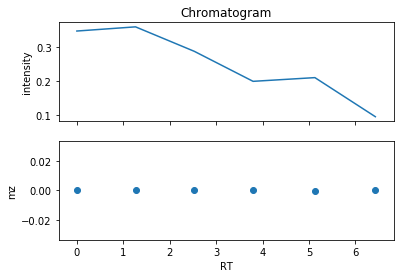

UnknownChemical mz=123.2438 rt=359.58 max_intensity=1.00


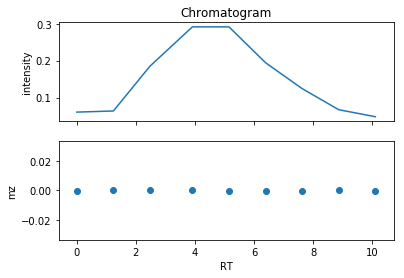

UnknownChemical mz=191.3350 rt=771.61 max_intensity=1.00


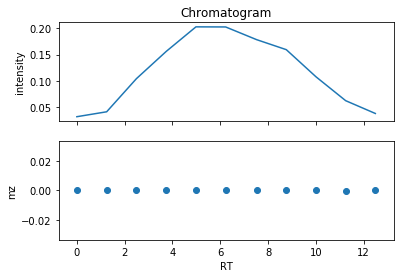

UnknownChemical mz=121.7274 rt=1103.11 max_intensity=1.00


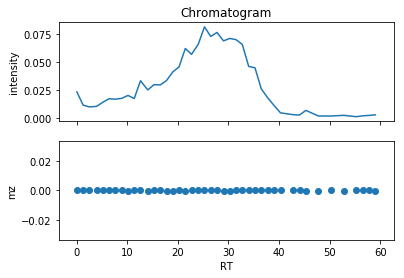

UnknownChemical mz=158.5306 rt=340.64 max_intensity=1.00


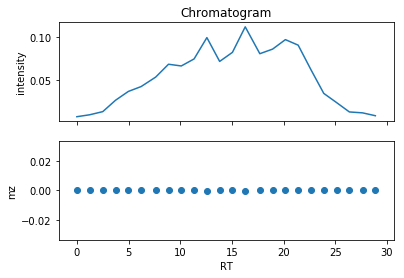

UnknownChemical mz=113.3186 rt=921.13 max_intensity=1.00


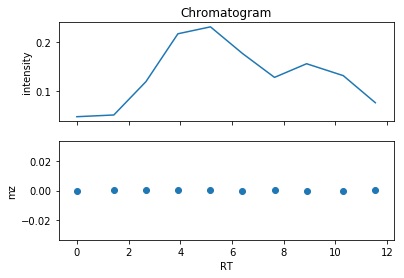

UnknownChemical mz=250.7299 rt=319.23 max_intensity=1.00


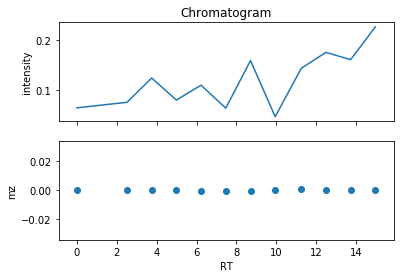

UnknownChemical mz=145.2402 rt=1018.45 max_intensity=1.00


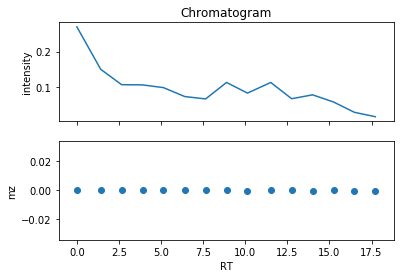

UnknownChemical mz=391.7352 rt=1228.93 max_intensity=1.00


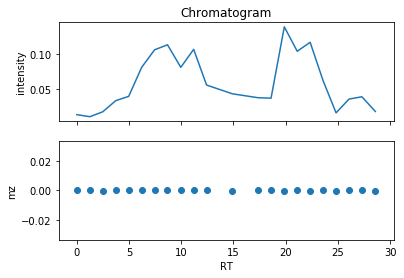

UnknownChemical mz=200.7270 rt=579.05 max_intensity=1.00


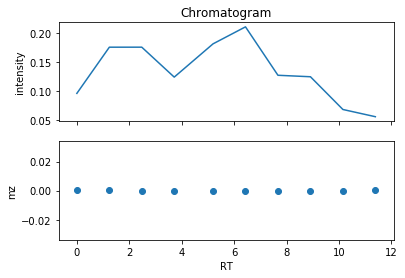

In [21]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in column.chemicals[0:10]:
    print(chem)
    plot_chromatogram(chem.chromatogram)

Connect the column to mass spec. Define the scan times, scan_levels and isolation windows.

In [22]:
scan_times = np.arange(0, 1000)+1
scan_levels = np.zeros_like(scan_times)
scan_levels.fill(1)
isolation_windows = [[(0, 1e3)]]

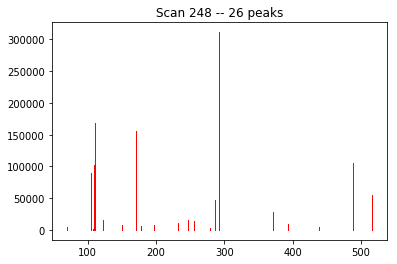

69.85929289641119 5120.0293892081
104.69614348864106 89214.13574896497
107.85437872857537 1815.356062456024
109.66454407686261 30917.865505260193
109.76673478449526 101481.9560520749
110.51158340121461 169101.4930276792
110.65200272930618 11265.421565972323
122.04297551484233 15985.343122658602
149.83478653701349 3179.2961159777033
150.05290030889424 7871.434718508729
170.5985189910946 155720.7663270262
171.1024009605129 13045.826859537705
177.963201481073 6761.607764004396
197.261392470002 8023.028241155283
231.50263318204654 10614.704230559568
231.9582273105306 2235.3452555743434
246.58394421142768 16279.461973241072
254.7936785013056 13412.754457504454
278.72341545544526 2234.984191390059
286.18883360824856 47778.006023135844
292.62936329743644 311303.71563865355
371.02253853769787 27537.26020199822
393.6259342302407 9277.512246240196
439.0429470179513 5323.932453764813
488.2697218145524 106166.69703671825
515.2698872615485 54246.81748991601


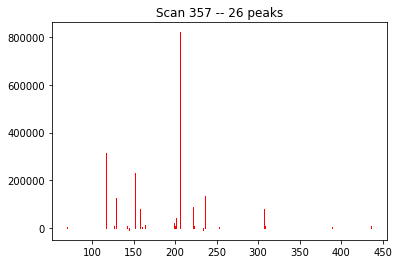

69.85911949476566 4440.225111661313
116.83370335380849 314530.93856989034
125.90607337323762 7859.974346938088
128.5861459189673 123761.52622722162
141.54246540513375 8902.940462985342
144.1680464623884 -7115.392731074243
149.8182467522403 446.69081370828036
152.2168443463439 229664.3356550212
157.40553169377046 81672.54931438499
157.52320566766068 42083.65899441571
160.48370097112357 2971.278850856451
163.57642652028372 13913.509448006738
198.2147569525696 21725.34637822165
200.01002825288907 9480.839936260623
201.55503039158526 40483.57201453242
206.22700503771736 820190.1053156934
221.39880015548482 90018.60125453252
222.7620858142623 9500.916589107192
233.9916126013975 -8048.507349521398
236.3063042225084 131992.03277693203
253.12744173844598 3553.5298466417657
307.7165615744286 80526.78975609771
308.2554324042234 6356.252500563203
377.33108946374927 -62.6531950501268
389.4072778690211 5255.152097819552
436.57506819154054 8962.488353055009


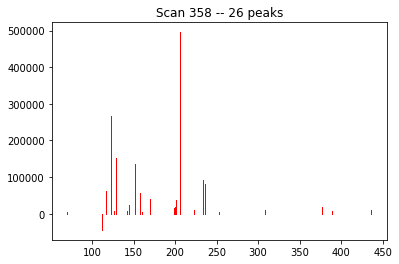

69.85914315180288 4953.117906881037
112.39258257518208 -44354.556669342775
116.83362940168085 61842.17052080997
122.46291294343409 267082.24076204695
125.90624578893335 6438.627980664424
128.5859631615116 152748.8905505353
141.54276760912657 7419.915453387093
144.16802610991562 22470.496591621544
149.81839418015335 -521.8896996467032
152.21622176382675 134879.28064034416
157.40548764789253 56127.022052036984
157.52327918972873 24039.599110775052
160.4837376509048 3548.065086751269
169.9076128248484 39391.42877007857
198.21417778331343 16141.312007060109
200.01061630686507 17363.91477345571
201.55517688473842 36682.21254012511
206.22720245639172 495457.32091580157
222.76188850131103 9334.609094909289
233.99319375362737 91906.29216528931
236.30625511940622 81070.3992985705
253.12723280616424 3697.911901157785
308.2555403706507 8871.885858200721
377.33186094348184 17910.21673551505
389.40730064408086 6235.528714976915
436.57490817427686 9297.598013702158


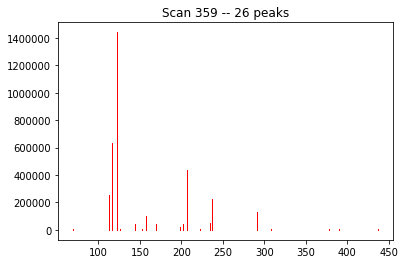

69.85910613264241 3424.072804867717
112.3903260611974 254666.98797129915
116.83383107808565 637002.8299498999
122.23634424659454 53515.91288570117
122.46305632890996 1441388.3338332365
125.90591705037168 10046.996537472645
141.54284342919675 2965.2016497773875
144.16779849812264 40753.94599715663
149.81798891943163 472.17506411981185
152.2148527024019 6580.312317309975
157.40518461339317 101373.63458137182
157.52335015684878 25435.931056017067
160.48359876884587 1467.4291370990563
169.9082486077258 46124.649928904364
198.21413904404156 19952.973501453842
201.55523729166322 41303.049210064935
206.22727634883242 433317.2268969706
222.76195598345433 4384.641963557034
233.99435332794428 52720.80905987619
236.30633809532014 227988.01376312002
253.12711014708788 2890.849282108754
290.79257199889616 130909.0836694228
308.2555183454014 9273.301364630901
377.3305870566937 8442.047629122359
389.40729636299665 4487.0511504404385
436.57562431439874 7778.281954901845


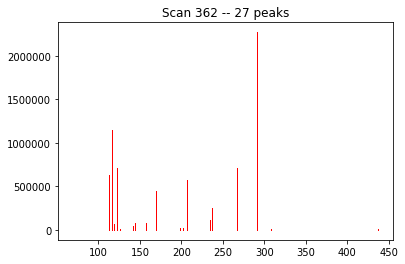

69.85905476268475 4092.120966112189
112.39246208905784 633867.0597950564
116.83389534555198 1146028.963944424
118.38569953828491 73671.93361270748
122.23666104574608 103348.15632001999
122.46283049479115 707331.7014407162
125.90589684048943 11426.718849247276
141.54267656184877 44940.78192356711
144.16786424172432 75857.7429277382
149.8178995825377 3358.3744311400874
152.00450048884647 835.2052793198385
157.40542426082789 79877.47397419951
157.5232837334475 34832.48163998448
160.48357738444983 3284.6673277306327
169.90751857533692 444334.7784186463
198.21428901530277 17143.925679764918
201.5550009253656 25340.564640015076
206.22676558889862 569759.8483806951
222.76105262858772 2669.8488072682126
233.99302705228146 109789.15082954238
236.3065417580282 246343.61098022154
253.12701899689935 3505.5957499532137
267.3679694983373 716122.547244431
290.7931462615607 2272422.696868892
308.25555234673493 11916.922936078327
389.40727647843283 4473.74600251714
436.57573292959256 7019.116916728568


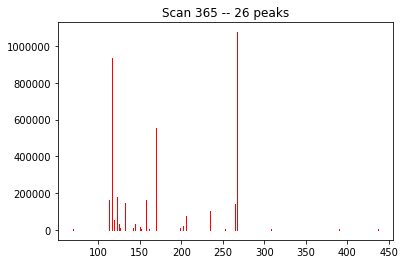

69.85906836537607 3464.078175980569
112.39202645409095 164562.31284618095
116.83399242651465 934904.0902077027
118.3855347697391 52641.02174315436
122.2364264653138 177039.87336609926
124.72502884536657 34386.199435895796
125.9058004890621 10487.598464425353
131.57280847100665 146813.8418510099
141.5422517841625 9032.437018962524
144.16807101728602 31220.10674539861
149.8183844359973 13719.613361082507
152.00373861201325 5812.636620116263
157.40534736534156 162920.98856572068
157.5233491670181 7707.067392285946
160.48356062030172 5469.478925215461
169.90704168814625 551909.5350964849
198.21406661063511 8115.8933699600675
201.55517887690857 20938.14776428707
206.22717280764724 77670.72026861476
233.99363677419475 102509.23790846762
253.12766532849895 6010.807171421392
264.6643660780336 141790.1744069142
267.3677927363486 1074526.614354438
308.25547965557087 6617.283125952086
389.4071736233894 4433.101281764866
436.5758415447864 6259.951878555291


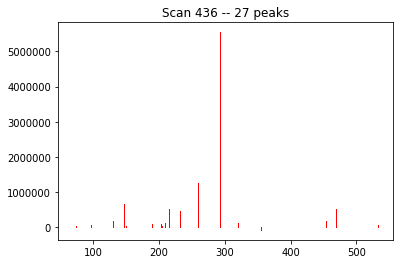

69.85912581179747 2528.503719555545
73.24889355192539 24860.34482493595
96.29514709361503 63003.72829652502
130.50997250344437 171743.74187542044
146.2947706827751 674637.2613013824
150.70463731411556 45883.99881190325
162.0996181312877 2347.1141104179246
168.56940128561837 16085.803299587811
189.1321386613036 106618.46906457937
202.77838668278397 94141.23609871986
204.64558836569304 29800.38123606174
209.1741623425234 129858.49347466773
214.6342074599671 517236.2141278572
230.37259400439174 9405.64146263774
232.74571115286614 466178.3880141742
253.12760177101043 841.5891151235772
259.00927272974025 1252880.7503927879
292.85455910877585 5543735.270357845
297.73393673486464 23967.733340136463
305.7404611273952 9998.820477783496
308.25551138993256 7983.632396058817
320.0384887193897 113027.35370563899
354.66549350014924 -72941.78102425706
378.289799481257 3271.114331241168
453.90830615512846 167862.92387495487
469.51085495971085 516406.6128497257
532.4316245637588 73461.2495635325


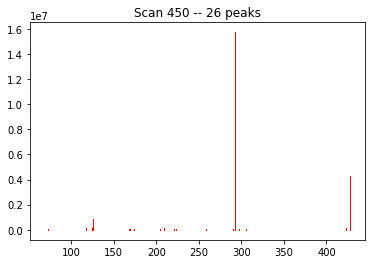

69.85902194467131 2019.6282783559486
73.24892037148106 37718.295975787565
89.07486776314131 -15267.062728810191
96.29583658615165 16269.933295992052
117.05894586982788 115091.45810350015
125.07958005745716 106848.36128773433
126.32021583949643 873303.6132319542
168.56936452487383 20876.202033260666
169.26434134205329 43034.979719836665
174.13539979869964 20534.302684061742
204.64567638711696 53825.203383649896
208.65985665375607 134595.72126694492
220.330687527328 19284.45414311789
223.6887615975487 38771.01064054792
230.37239911144013 6143.475905085607
259.01697626044455 53758.25661036223
290.7082262951757 39500.14734503099
292.85406359958745 15729798.319736084
293.5434665032189 8814.649724448782
297.7339381033246 36166.0403311181
305.74033905708217 25507.288737694562
308.2555434330135 7216.3723432002525
378.28951886260256 8680.631923712528
391.9108079887357 5702.34654829514
423.07421927764375 129529.06725374509
427.3461948797775 4296770.26416189


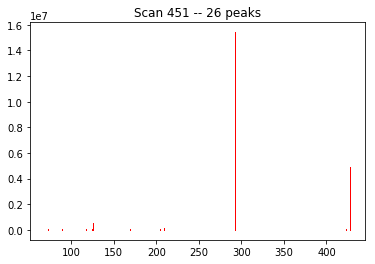

69.85901470836367 2151.9967762386777
73.24809716484712 88812.61241451855
89.0765986610417 49980.94713033597
96.29635020598056 21339.67691135037
117.0589699269139 107808.95472006718
125.07958645477991 94149.5932121113
126.32066163087183 549119.4871377485
168.56932853716393 22018.471333867812
169.26482709586352 33255.61828370621
174.13538332870306 20831.755860593817
204.64562499558318 39692.50132993809
208.65988302907925 188395.36973704532
220.3297591324266 13968.53965385915
223.688763601708 28897.26299414436
230.3724355974379 4047.8626842673934
259.01710475374784 28679.835587069952
290.7084904469999 8805.349746904958
292.8537877912349 15421334.746077828
293.54314317453526 15698.338497920251
297.73398251123166 21815.068267506966
305.74029630131633 18928.211746556484
308.25556372395636 7967.591335132053
378.28922305409037 10389.094961127836
391.91069600504784 4406.599722234783
423.0743488820066 95517.92704576196
427.346549319502 4900720.890861126


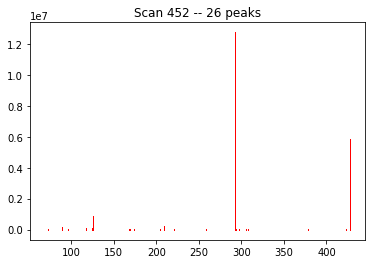

69.85905079352389 1708.6810537251833
73.24831583083841 35228.34884871831
89.07700339608023 179192.69575694262
96.29472348658635 4147.98608870669
117.0589693590265 130557.09999878387
125.0800397636409 117510.11346068446
126.32032613242369 902626.432588894
159.12425507724092 1102.3586060224557
168.56942947203692 19909.914183333425
169.26464297710302 38168.964915639845
174.13558285174432 24725.57832081724
204.6455281022304 42089.208190476325
208.6598710633866 235167.05382952528
220.33006660762462 25547.120015982357
230.37251885480524 2620.0027994075176
259.01715385685 35343.97686045746
290.70862955237016 -23153.946971713187
292.8536375640577 12763088.158055574
293.54292650509325 28345.695227909564
297.73398055295644 23123.49332761207
305.740322922667 11395.742021602951
308.2555030866124 4623.965868543901
378.2901752696711 4564.991610739081
391.9105857890751 -4142.548399734889
423.0741567456078 58339.21245568848
427.3467213706824 5875026.929095836


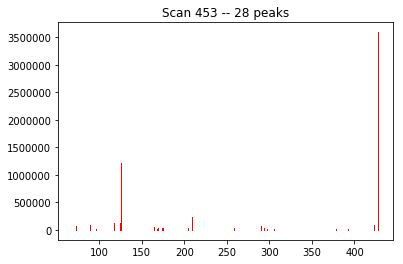

69.85897982241228 1517.55372438653
73.24872878725398 62325.923107925446
89.0760028437655 94747.06196864472
96.29567742545596 18462.498254670503
100.05446592778267 2369.2744378301554
117.05889715655489 123994.93545131639
125.0794161597846 124433.6462465119
126.32025235906752 1218082.0495179673
159.12446660234286 1856.7030418623247
163.98259754806503 59507.89641176429
168.56937091594642 17941.91409191713
169.2644103851765 37954.192874742614
174.13570347458224 31658.87594639039
174.58747125874672 43560.388259166924
204.64563304376935 33724.67790891634
208.6599514937503 241698.33669677755
220.33033179047135 4266.384796484873
230.3724313152709 1702.2917993960973
259.01700119686535 28552.24545816884
290.7083856029193 62228.70925219273
293.54294030893556 37179.12994772153
297.7339560014054 20333.29568411229
305.7406190621515 25293.485949463233
308.25551147828537 6809.858875743057
378.2893928339037 8401.704681053958
391.9108508729893 17540.258967897294
423.0740219289982 85704.3304514099
427.34

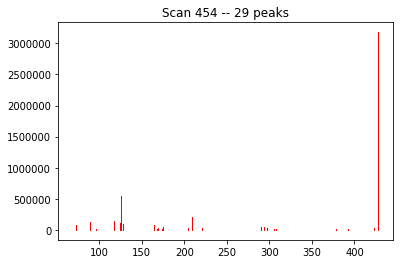

69.85917899159631 2042.6839962487793
73.24931179764002 72864.92591804574
89.07681631717257 129096.25898248727
96.29527427968466 6483.357489559289
100.05437613551179 3273.614491665904
117.05911502643251 139856.55771638895
125.07973825196338 103380.60910978015
126.32051620359401 548538.5541371595
127.56673750780091 98788.1483778204
159.12446660234286 1861.916426320473
163.9825442992567 73119.78491272697
168.56935059798505 16752.1880179198
169.2644103851765 33404.534379306635
174.13541838153563 16074.072495441102
174.58747125874672 51811.77736633032
187.06992341894556 -1010.4318307953415
204.64568206799117 37015.25666445907
208.6597076044579 206322.99320298166
220.3305536399489 26805.446569272284
230.37241139506727 1540.2808005129434
290.70808534711534 43821.24158958597
293.5429035407693 39136.69791300524
297.7340757486688 29732.652455302516
305.74034182785925 16669.54096262827
308.25546755944276 8549.170051548796
378.2896040624839 11469.258925128535
391.91081470769683 14471.58034997795
4

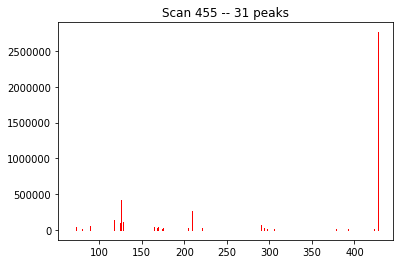

69.85910443736289 1864.6260056635333
73.2474863418184 36943.86386144987
79.8576573016936 8808.074556264519
89.07451761009067 56342.72627601861
89.3314469965898 23673.166938592083
96.29493083427232 764.0643180800652
100.05469453720922 661.5985491773306
117.05896508988587 131879.2099744069
125.07970650690997 100377.3623390924
126.32024689636309 419715.2052805521
127.56671293648206 109142.94377139657
159.12431956697546 2239.331004367001
163.98256528777083 39568.46458564451
168.56944671693083 20489.396371730294
169.26439937026902 45107.261162510455
174.13531549509042 8923.379089103571
174.58749234276246 31042.752339333965
187.06808373621803 3703.573859578834
204.64553283547193 32556.589953828276
208.65980611644937 259800.72563907402
220.3307011866604 31895.496018857553
230.37241139506727 1804.9073787260706
290.7080353974966 67903.36955326848
293.543004263215 31521.153124655357
297.73390116259156 19187.903235204893
305.7403609851587 17056.60771795465
308.2555541066514 5262.344872122066
378.

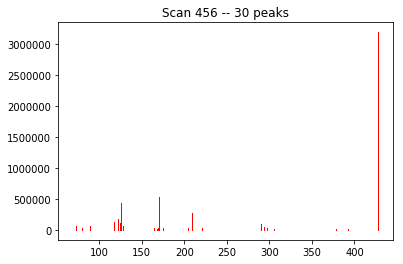

69.85901414777622 1664.8412986940984
73.24778740478618 57475.20830209477
79.85739395349457 25315.648217708003
89.32940769845472 62951.11931565558
100.05366586136972 6308.385650046641
117.05895490377841 120369.97522366513
122.22197906704892 177805.43460282072
125.07997198556872 110154.65936286165
126.32028276608831 441493.65203026385
127.56684343364999 66798.86809073604
159.1245663706187 -201.7563570954633
163.98257754382627 26197.72967111732
168.5693655305935 21442.96483049109
169.2644175953537 36362.070240711306
170.84764413392918 527181.0612611886
174.13538934390644 6390.746377309236
174.58745542625638 35778.99385975691
187.0688255286229 4278.744480637125
204.64562219601126 24420.635305516797
208.66000726446117 269589.96220965614
220.32989500363811 25810.160680422312
230.37239004203553 1164.9772035948536
290.7078743798591 93876.47174047561
293.54290957955766 46900.9869420859
297.7339090559779 30254.545762058435
305.74029499605916 16152.5979751696
308.25558992540493 3913.734501197374


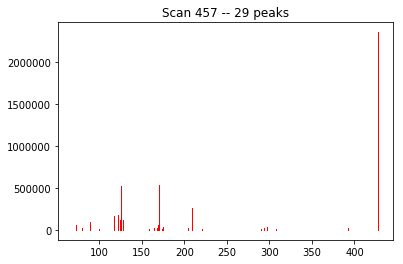

69.85896646406063 1610.4879339006748
73.24864097539124 53549.125049730595
79.85657982246954 23529.409955498537
89.32977013045469 92190.50508841257
100.05429364916613 5984.5777331263325
117.05898518570288 169527.195466998
122.22196779763311 179754.6779850982
125.07939294404945 118466.60002203278
126.32043953118642 521977.8813167613
127.56666387827767 118676.24877840531
159.12477484924096 4156.61351387549
163.9826228971111 26859.753787685993
168.56936027703324 18439.008141361795
169.26443217180028 59021.59857422866
170.84759557771915 533611.4097426106
174.13535263471076 9002.96100060127
174.58737302133483 30997.769605512443
187.06845576798324 -1086.7401197885335
204.64567148906693 26543.9428149235
208.6600686927591 254442.1144638931
220.3314278802151 9455.708710827013
230.3724880365528 1426.0545381171946
290.7084293783195 13619.117309944235
293.5431821829911 26929.83544269613
297.7338354605326 32574.152319208337
308.2555030866124 7966.725541638061
378.2904128088906 2906.818148757176
391.

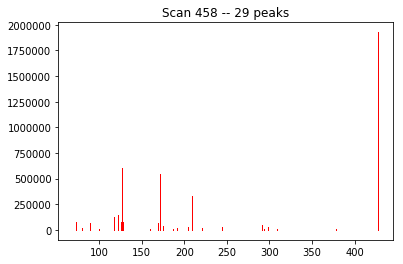

69.85908297982728 1604.402109963297
73.24877885601546 78117.85698272198
79.85855572642221 23249.18613439142
89.32946904088878 67321.93399508274
100.05436581763094 9733.121135096013
117.05896817599289 126305.88415990965
121.53482801680794 14622.920343185464
122.22199684269935 143991.23479511536
125.07972298873797 72457.02082742524
126.32051133725308 599103.9551083619
127.33179072825442 73960.9699651448
127.56672140395742 75799.99864387476
159.1249034483898 4603.232702206659
168.56937681428357 14893.942045359734
169.26441103774349 67563.88394676709
170.84784709757488 542990.9932128347
174.58755335963858 34749.172315363474
187.06901014004742 11883.519936287148
190.8824111723948 16703.125315937057
204.64573005385395 30226.71253082377
208.6599352687213 332871.3972722707
220.33064541882928 17877.07619194188
244.411307139193 30900.186769995726
290.7080833527067 44019.88552487647
293.5428610119463 11265.833346522164
297.7340696984673 31821.646837917175
308.25548158774893 6122.58716905189
378.2

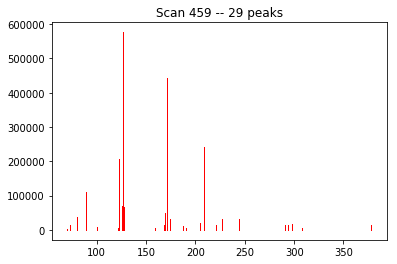

69.85909670147225 2103.7184504613383
73.2484413579172 13480.831407688256
79.85818301983798 36238.00001481521
89.32983147076445 111353.2113139817
100.05419412942842 7110.254561629789
121.53498489693547 7026.637099783936
122.22199684269935 207083.4867714211
125.07966721315007 68334.52494318993
126.32039199608633 576284.8046066646
127.33174625073949 68152.33556253242
127.56673368961684 58813.27445685504
159.12497710304305 5664.477741593216
168.56935286014073 12879.790023078645
169.26435235724298 48329.1189215214
169.45452696594708 3753.7679115549868
170.84744312227505 443975.6035763239
174.58761483743473 31351.40782129053
187.0697812400666 11183.351070731971
190.8814004933132 4238.120388153872
204.64552403536345 19858.049324953798
208.65993215754133 241471.77277418447
220.32944901805075 14168.614586504682
226.43964119990645 32131.30128583845
244.41133124816113 31717.15579375668
290.70813121763746 15306.042000118561
293.5428141699233 15621.069452526148
297.7339155090636 17437.5138845817
30

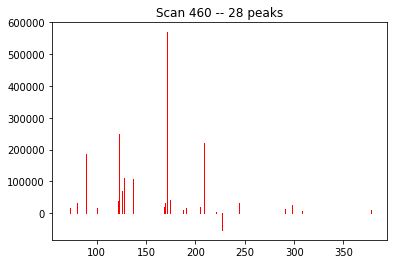

69.85906949683388 1579.4773798737083
73.24842892013046 16218.615723548108
79.85795525576307 33016.7509834269
89.33115823772428 184676.5490573959
100.05491030756156 16221.899971831386
121.53491448139923 37773.60714559005
122.22198062761714 248772.34269137442
125.07961883398393 69690.11965083104
127.33170942341287 44145.54470452312
127.56671543067753 112034.14103891453
136.49079133739227 108668.88223793692
159.12480229570184 1992.113337980387
168.56945397159635 19746.380614782513
169.26478454693495 33494.25985069752
169.45443636113404 5403.071997744737
170.8477030564814 568186.7988700722
174.58750276529187 42287.14789605015
187.06966450816395 10589.940687509184
190.88351612990752 17696.461103804108
204.64567290867566 20998.318523553135
208.65988208244036 222040.07966716815
220.32932576450472 4956.326874702617
226.4395424375181 -51946.21380655008
244.41132819508718 31575.77781308022
290.7080085585611 15112.80045679381
297.7339720148655 27743.879765102232
308.2554568091129 6554.79161047644

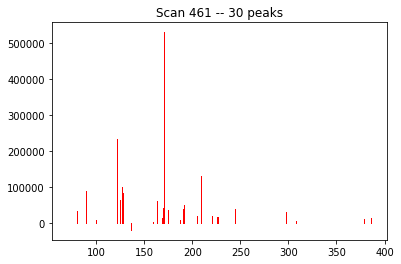

69.8591317776053 1520.6601382781678
79.85800455718142 33854.84383801479
89.33039647658778 90469.88696892584
100.05429993968794 10076.713032412856
121.53491295343333 61678.908205868895
122.22205787785535 233640.30650502825
125.0797815110488 64737.797073279864
127.33176414882021 101570.5280097736
127.56668078830099 85183.62536309219
136.4911893612013 -17973.29265425097
159.12465980573012 4777.572375658892
163.35721754568368 62246.91602762808
168.5693502718045 15978.204321343515
169.26429597369105 43462.83330368056
169.45455198003071 18932.970898101456
170.84768318180565 528910.2305760151
174.58742548237873 36117.787655778244
187.07019685240337 9657.45004079974
190.88392277105578 40039.10337820235
191.64736957320588 52158.19022708837
204.6455687078031 21544.36849878233
208.65977795671657 132294.387434021
220.3292519330147 19394.514402804234
225.84309327969132 17648.472738918306
226.43982835604706 16778.060062612523
244.41134677339895 38743.04089142842
297.73392291176333 31386.161225964774

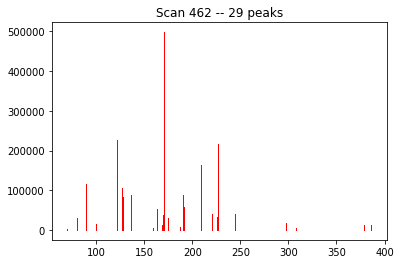

69.85890388332285 1695.6375068455875
79.85791062303068 28994.32950597265
89.33093791749017 116567.12839912034
100.0545387423897 15825.961685219661
121.53490062807872 60895.80034997378
122.22205787785535 226884.99476943092
127.33188590700948 104644.18863859438
127.56668974058672 81798.58335174147
136.4911556691366 87401.937543219
159.12515610531307 4994.539486080593
163.35793170298004 51751.42546748636
168.5693423129548 13100.034637844014
169.2644866791215 38110.931289966014
169.45455198003071 9080.975581506265
170.84768318180565 497818.75657565345
174.58742548237873 30201.70953693047
187.0703447566594 6499.830910704459
190.88425893801787 88935.593667542
191.6498209489977 58808.0158666659
208.65959322561406 163180.3099147413
220.3301820978547 41035.033864140576
225.84420266170235 31337.71923876683
226.43996662459534 175011.5633306834
226.70552716517554 217181.90748761824
244.411370339097 40610.865711706545
297.7341388045809 16888.90956524318
308.25546602653355 4677.179541101525
378.2899

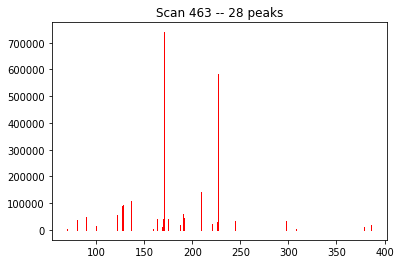

69.85905246224932 1683.5059566924472
79.85766095753172 36640.793291063674
89.32926261500701 47471.28558426031
100.0542957571303 15816.864143912786
121.53496255285572 54872.918153378814
127.33173579860913 89279.15030026497
127.56665559368008 92147.2467624613
136.49100303427917 107660.24025491212
159.1247814019253 3610.6691806350327
163.35881912851477 41373.4025449195
168.56938143646164 12540.586700716061
169.2644866791215 41709.172593278905
169.45455198003071 27431.95778473976
170.8475837120531 739059.0327348466
174.5874217980388 42146.701538675254
187.06997524551534 16921.942058048233
190.88420955682375 59284.56145174944
191.6487782808155 45804.184069477225
208.66013132991293 139923.91809570344
220.3299953770159 23455.602948191732
225.8446743398801 29893.047193481158
226.4392581075019 575268.0258194363
226.7053734915274 583354.1231956158
244.41128058865507 34747.36909990611
297.7339125545113 34726.00438329894
308.2554943767569 3273.4160657780903
378.28970557158453 11609.57852035127
386

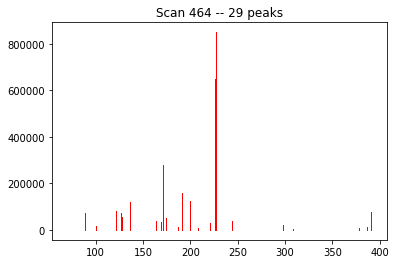

69.8590432445905 1617.6301474467723
89.33012339364353 71929.35630223929
100.05397607258878 15818.95082629322
121.5348439083091 81664.54810668029
127.33173579860913 70750.94575814951
127.56676292026019 57328.001392337996
136.49095377265203 121180.23492266165
159.1244627444827 1689.6337401063697
163.35668079466222 40016.04750333929
168.56940459092144 12793.878526651557
169.26451774328808 32065.87220017553
169.4545747644622 28281.814402182
170.84791016343524 279321.53666898387
174.5873234335642 49998.009975725494
187.06992557790284 10757.565348653563
190.88448873897735 158786.53271596006
191.64853256762544 32659.969112039613
199.17182814834942 123305.18295333878
208.65981392594466 10136.316154695522
220.33054210239928 28928.592662439863
225.84355017069365 36378.06760037191
226.43937913534484 648669.1073476915
226.70524964727076 849109.6272115263
244.41139482135293 38608.96231177414
297.7339522969563 19426.243891746464
308.2555183309005 2539.5951784554104
378.28992807883503 7827.5987181304

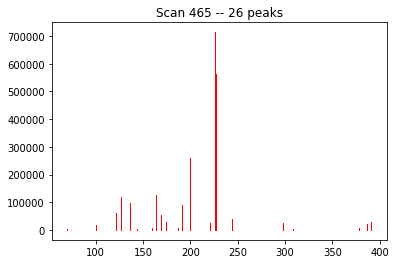

69.85900200462025 1689.5310625160337
100.05508466029151 16331.250225401596
121.53495007776104 59762.749717414685
127.33171586704525 118172.52498706509
136.4910495625325 97145.6640651868
143.85442018406897 2334.924317608527
159.1254098118836 6319.297743950203
163.35605650515916 124963.65350880285
168.56934174194683 11483.605690149278
169.26436348624773 30180.933963862066
169.45451030844978 53765.63833635848
174.58756712266612 27179.57360902285
187.07026289826317 5757.586730826755
190.88425127994873 90872.3485186019
191.65010549836921 73292.90972612017
199.17179280190786 259130.09614692468
220.33096150323027 25939.826493373424
225.84360396933266 23525.642912901843
226.439355181202 713706.5291179807
226.70517557547953 564559.3007352893
244.41130421492778 40972.389627169076
297.7338857287979 24279.364622324694
308.25539713048323 4364.49596090581
378.28993677645553 8581.813901319181
386.2940633269889 22102.59490707559
391.25027929635917 27695.545867333636


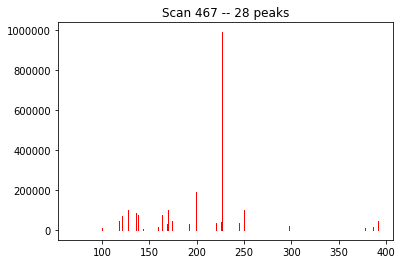

69.85884581142777 1130.5147777589664
100.05450738432901 9030.221259975593
118.47658884003737 46061.62337199991
121.53510710976947 71103.44134813763
127.33186390545077 100183.52516203791
136.49102647976298 82764.6310306431
138.09359366388298 72544.40906502234
143.85689467623794 2700.697303530269
158.97509819576175 16777.135671179833
159.12424883568946 7395.225728434427
163.35640900397914 73378.86327010544
168.5693004389228 9651.389262386452
169.26468518883524 28807.468660163755
169.4544789437779 100856.82998619559
174.5872421911984 45858.991176124895
191.64748822735794 27276.930220307124
199.17153994906485 190997.47058716678
220.3303564561653 32418.68654186715
225.8434692631402 37864.97855558824
226.4394687725465 735407.5872619017
226.7054857655768 987549.3984218799
244.41140340293597 32814.85064116548
249.84172228161262 97551.52488081598
281.09153567130056 35.44064511819926
297.7340683829266 21087.013173795152
378.2898039393441 7092.214183946328
386.2937023675779 15131.525655333327
391

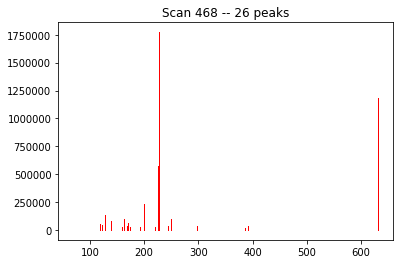

69.85905246224932 1774.0435826507137
118.47661416821637 55640.32986936548
121.53465938496572 47002.50289562257
127.33190082187579 130283.19997422016
138.09364276698517 75074.97904271496
143.85557111621682 3090.076684531196
158.97520858893057 24566.411615645986
159.12524562091915 7476.875371875333
163.35431707322027 99786.32575836018
168.56927642823908 9169.564657954967
169.26457073479813 38512.61993361345
169.45454244503932 61908.71612322008
174.58740798235505 26216.512290055154
191.64640969447677 26567.601108198298
199.1710829124971 231353.5179575131
220.33046307973007 25054.267523292077
225.8436168098509 44134.60628786903
226.4393476215497 568659.7330525529
226.70562591900756 1772662.011873249
244.41158206660242 37973.69109739495
249.84190756418926 101707.9272458207
281.09158505249474 -427.1590126721083
297.7338979683729 33161.78966950655
386.2943450934297 17543.942969776184
391.25070198349397 37458.661912218005
631.1830431095201 1184483.3502657716


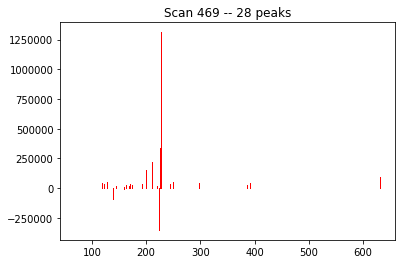

69.85905246224932 1865.6752944112627
118.4766507600365 44284.04012183171
121.5350998214522 37597.123361018326
127.3318120925541 53213.9402302932
138.09366593500297 -87472.71178948597
143.85491860098128 14248.30224296363
158.97496387836082 -4295.876056940844
159.1255650480657 7593.420875117828
163.36055700047243 26076.92958803106
168.56934442990317 10598.06888327442
169.26448765438397 20299.411759584487
169.4544512413567 35086.14486424079
174.58734650455813 23354.524276873635
191.64940556333593 32666.45188172119
199.1727083935246 149348.29531569808
210.7870623182009 222049.7724462859
220.33085812928508 19118.79332141903
222.98956907092528 -351546.5019867364
225.84335305592907 31127.343358830123
226.43923096404754 336651.13850226987
226.7048084052056 1311530.207404959
244.4115055633194 36248.74817178761
249.84184035722768 55251.17856144839
281.0914647604507 -1295.8960268668106
297.73386547046846 46933.59046347954
386.29468259947754 25554.08075664215
391.25049224539794 44858.86135249976
6

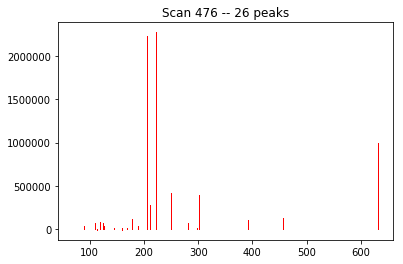

69.85905278192077 1412.6738183253963
88.6903725645767 5288.102171627177
89.11898260359071 36822.11545066504
108.94190253880672 75769.10803125711
112.65028832693692 -8734.09919146992
118.47648619394586 80641.37466021997
124.66773887933104 65743.99031962216
125.650780275132 33944.5275550636
126.13948555487079 9869.03936193977
143.8534951569164 8514.18646780688
158.97518050472232 -8116.22566725583
159.12466878694323 11382.494506693376
168.5693469227352 5872.144704355356
169.50327849603121 9371.80476942179
177.2893944027464 122514.20565974839
189.33904859679737 35073.19102718918
205.29535014279577 2229581.8813481512
210.7867672970816 281402.0110297922
222.98859380320985 2273607.9094849685
249.84195449694363 413220.21018299845
281.09049997256665 68462.99852404697
297.7338918230728 17385.665121347516
302.250332416239 390553.2958709088
391.2504448730789 100251.44659066363
455.7936646989082 125692.38438807249
631.1828315627799 999834.8292908361


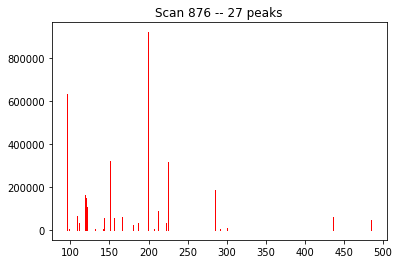

95.71757766884333 634423.442588316
97.92025647632549 4375.081978650992
107.89146486652466 66154.97577924578
110.51318031407057 1614.9729389187369
111.21024326907009 31898.946861107695
119.04685454282735 163099.5406866834
120.51129233529659 150932.30773840932
120.8992187149007 105075.11465132644
131.64491878107364 6385.428509821573
142.02444741475256 2871.343761248636
143.51275942004148 56975.023687603105
150.63973704166273 321725.6687270117
155.77775718561503 55172.14092040795
166.11310480536395 62312.45016305278
180.3924714470662 23501.955957464826
186.11900170457284 33954.21755606692
198.87167110701478 921707.248705321
206.531663373338 4048.4995009621884
211.9130538373555 90039.35692586761
221.89073740639907 34490.861328430765
225.22328782811272 316189.7191469178
255.13433136953049 144.14531051413738
285.4318463476116 185313.19723380197
291.9226123188218 2469.604413060304
300.5630556852789 7669.884795911853
436.23465623000914 60487.04033175897
485.33210845476475 46976.15371790373


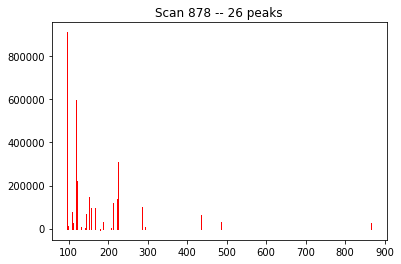

95.7176667039545 911094.6778243844
97.92105886759299 10312.16267124213
107.8915601260153 77953.55644272365
111.20999156055177 24521.326555863674
119.04667371654226 598613.2565467656
120.5109888707025 222195.00479490223
120.8988848163336 112778.43681305861
131.6435527447217 7652.283177241699
142.02464810123382 1216.8539568619435
143.51257400352748 69125.61462699273
150.63989244384268 146149.86473554923
155.7771954530748 94693.63895476377
166.11327831048337 94327.13304541224
180.3929307904334 -5860.599875616273
186.1193039146669 30056.922497657466
206.5314517811026 4733.999380575909
211.91283751796004 116952.13883254115
221.89402039963147 136349.3215912597
225.22317185950578 307958.972048773
255.13431842200143 239.5418663113104
285.43182905031813 98442.62244466801
291.9234192191161 2304.7087862886315
293.98361230464826 9393.120676356917
436.23463431110474 63973.82791975266
485.33092506849465 28844.07638891515
866.5815143779141 28388.61439105559


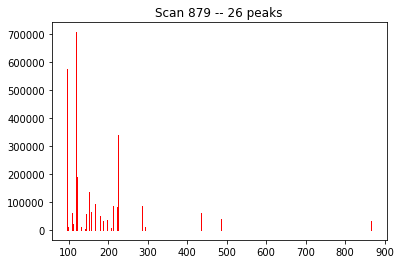

95.71753717306636 575879.5511310839
97.92042085452832 9578.577505694824
107.89117995150818 61279.08259044753
111.21017323595451 21028.32503690843
119.04688679505507 706361.639326418
120.51093385589934 189051.44151546454
131.64347920838915 9959.415418537723
142.0246961781972 2725.711707061289
143.5130981927469 56927.758141780716
150.6393438424393 136061.36782197375
155.77765696219308 62695.56718129159
166.1133620349772 90917.84927451434
180.3928567034346 50795.58035011547
186.11924737294885 31227.07590184778
197.544649919031 36215.105259958946
206.53149860084014 5348.023361873961
211.91288049180824 85575.89627990728
221.89135142615274 82570.05388988537
225.2234705662862 337964.4271811083
255.13441873376723 291.67563718162535
285.4317861196413 85862.27495557592
291.92382266926325 2222.2609729027954
293.9848054566943 11335.702910437663
436.2347079384782 61130.72488834962
485.3302825931659 39994.83473217304
866.5814923919149 32460.937875917443


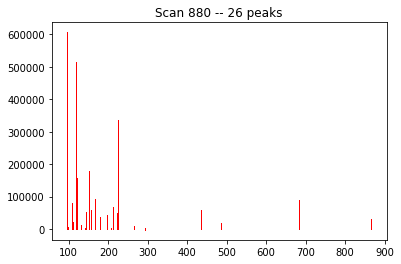

95.71747851121991 606860.1755298373
97.92038547293213 6950.022192377713
107.8911473805737 80164.56285340893
111.20994668773629 19964.35222507626
119.04622663765304 515478.18464501697
120.51096534342905 157019.7305002587
131.64340567205662 12266.547659833748
142.0247821086268 3238.5974118890917
143.51283665232512 51153.93432072276
150.63922776589783 179317.00164597627
155.77719912049145 59996.68019357849
166.1130521722054 93126.59318921033
180.3930999291181 35962.03735113862
197.54459953185008 42057.93373740846
206.53208026264 4107.427802985782
211.9130936173993 66791.66056456306
221.89293553105594 49576.62018436655
225.22336129807297 336836.5070514511
255.1343756552439 704.9503428833125
265.89301062258727 10384.973796122162
291.9203885985791 2173.460827981901
293.9852126771245 -2918.527289203224
436.23460917608907 58664.1870273111
485.33195168314825 17047.69464763012
684.4277278103069 88501.22317303505
866.5814800565963 31559.965530964055


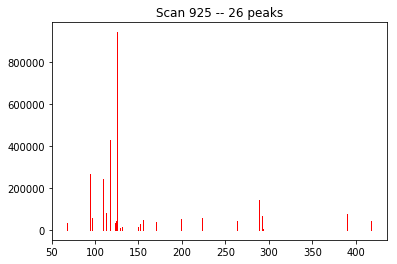

67.87272089339412 34707.56079599799
94.77446278405952 268488.45669128944
96.49104350706143 54923.384904929844
109.28359760669444 243931.2514265448
112.31102546703517 80755.82638093221
117.17632956181677 428749.66888856754
122.56828280323204 23302.342064666445
122.82417701503317 34082.876719048734
124.46660097144535 9537.768777503621
124.49984944537009 41310.46248153352
125.06089876051591 944355.6087995572
129.0634969034735 7975.441700054997
131.56723827398466 13924.132767735706
149.12663793622292 13737.512178261835
151.30731145058724 27529.423008741778
155.39394972639548 45583.00487434358
170.06626271908706 38168.05215314623
198.50033832439993 50169.419991158284
223.26606637993274 58366.69982735162
263.1222092409183 40403.6849266958
288.2927269667856 4620.9265402043375
288.7583125433734 141447.78735534498
291.9205966834998 67202.91747868742
293.3874310078777 4241.846032596099
389.7807308410363 76012.98731666352
418.12918061050925 41566.53151342376


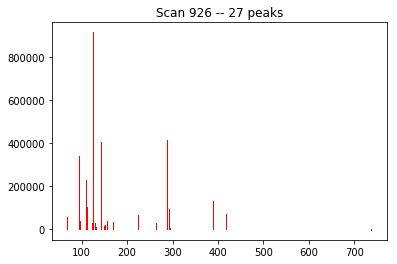

67.87295238919194 56616.96590216107
94.7746248211675 341880.2321373091
96.49138505554994 38263.210786986805
109.28368423634066 231405.75015915208
112.31204298304912 102652.45992749467
122.56825904489962 24351.75056045356
122.82420742472374 31580.693262949033
124.46685694562163 10688.085794209317
124.50042623441564 151786.22382740898
125.06077540733 915582.8146873441
128.46583749313817 30993.354530831875
129.0634980425899 7503.6845162509735
131.56703180658832 11663.244142499534
142.83590384232022 403738.1967056627
149.1297725377255 15735.333749539612
151.3073237164948 21580.604002542044
155.3954241133389 39663.95085667153
170.0664797640233 34192.58092709014
223.26570838526658 68940.54875708233
263.12226231483726 27377.498355787222
288.29273636838076 4346.030354661155
288.7582851322032 412996.9254543881
291.9205109818921 94102.55367993451
293.3869596041592 6348.440121472265
389.78068605630096 133575.8977300085
418.12902591569946 70914.82059748456
737.5624622077925 -2596.3248847198074


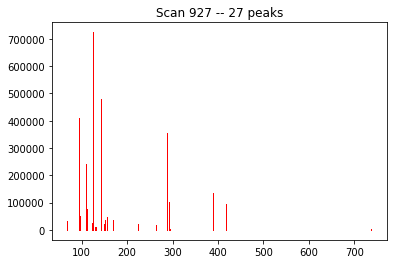

67.8737543617004 31487.14673891345
94.77485787341267 410995.2470160698
96.49085425539234 50457.211240806384
109.28372039460844 241036.79726150664
112.31109140448211 76297.86006618255
122.5682352865672 25401.159056240675
122.82418872309547 12025.63234857917
124.46690620724877 10015.020547293434
124.50050492721576 141742.31010045143
125.06161525162595 724474.1750567579
128.46602856587995 8028.805536115478
129.063403837308 9442.395768173963
131.56703180658832 11247.673201782705
142.83558286455727 478928.5479197749
149.12704075617776 19982.690348553697
151.30728651339004 38170.56567920853
155.3946002196687 45560.03798197123
170.0663695124331 36570.85144681157
223.26727214309815 23339.9771116482
263.12228269973616 16256.228246938064
288.2927084087115 5037.3175713768405
288.7582851322032 354734.3710286871
291.9205109818921 101794.34919645792
293.38717213515554 5146.870647050761
389.78066156386274 134967.6541307877
418.1290701991641 96607.95668008825
737.5626370740116 3003.358745435047


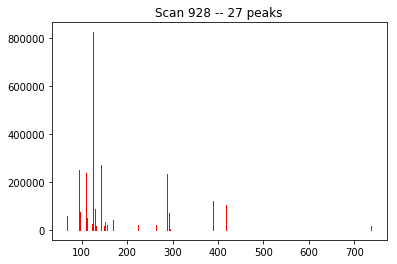

67.87371658081653 59578.92928308319
94.77414743541593 249568.3437890104
96.49073129979925 73349.85376110111
109.2836966858508 236593.18426243044
112.31137836353813 47980.50405711184
122.56821152823477 26450.567552027787
122.82419908912061 13259.69847653486
124.46676763299567 12449.867044930023
124.5008853347486 246080.55801196228
125.06013630178266 825119.9644044295
128.4666117950934 89126.84778569217
129.0634367792187 6038.799872808029
131.56701992065146 17423.901678629154
142.8367420258839 272088.35583927005
149.12838771936447 16387.66054048532
151.30724783337135 32170.349793014604
155.39517885008792 22475.83076797165
170.0663695124331 40351.616108738235
223.2676446017281 19464.960762144896
263.1223299113358 20642.561415280372
288.29270255305073 5400.453935704967
288.7582851322032 234330.88496857492
291.9204915191251 72466.69461865594
293.38734795456486 4210.4941995468425
389.78077814588244 119289.86840105322
418.12908073700186 104292.07089389859
737.5622960793003 15895.355316070143


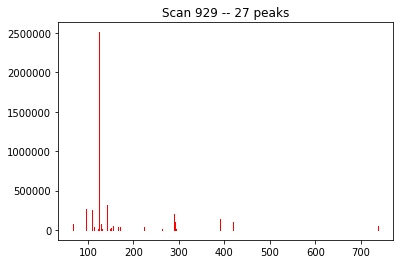

67.8738606222489 70108.08244033749
94.77444875863158 263095.2930670157
96.49098096405828 21736.690027439112
109.2837688030107 257925.96027269404
112.31153820580886 39138.48139504155
122.82418046629829 15375.088238395567
124.46672567590659 10178.5091679884
124.50022267207247 106230.9633763223
125.06066199157073 2509276.13840511
128.4662814424684 73571.9190293272
129.06333857301357 3210.558987412306
131.5670235531291 5702.4234910115565
142.8358491562655 315695.31086707424
149.12863428773923 12657.991475007066
151.3075144617331 23878.156155089022
155.39492334503177 44078.90446856597
166.3725826932907 41991.93843540753
170.06633524625974 32953.95771188112
223.26643210776473 32625.55400700195
263.1221959711515 8338.173613590297
288.29273213111554 5181.034994142189
288.75828615625323 197123.39004969998
291.92054149947006 98611.08443122904
293.38692718908317 6020.460071057876
389.7806265395735 138247.02811124796
418.12905256562016 94819.63678542798
737.562446790908 51458.428486317884


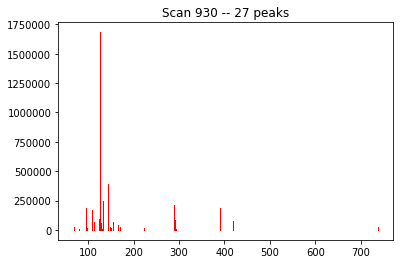

67.87326175231158 22649.551036946712
79.82169394165383 6033.046407138822
94.77447911562979 185618.66698521917
96.49107435638723 19108.478054005027
109.28348997987652 167722.57074418303
112.31109150172843 67552.73216155141
124.4671172278401 11033.857008436757
124.50005642845693 93267.24958336273
125.06088408259158 1682830.8405203712
128.46581345700915 56636.812108244085
129.06363232064442 10963.82131655938
131.5671159366296 6254.945837612157
132.30828642763555 247736.77644590044
142.83574900652803 393645.9764068087
149.12799632850587 20979.726066531963
151.30767404681595 18969.870098683296
155.39509520588933 66214.53767008931
166.37208433418903 42727.8912104567
170.0664235460671 27842.888558116607
223.26801505148828 20133.62379112747
288.29276878153024 4547.935610863082
288.75835957464454 216122.92670961024
291.92054830506555 87858.16970639984
293.38676798823485 6282.418576124339
389.7806296329151 190583.89697858028
418.1290057454116 72787.13366838325
737.5624223181109 24169.09830568391

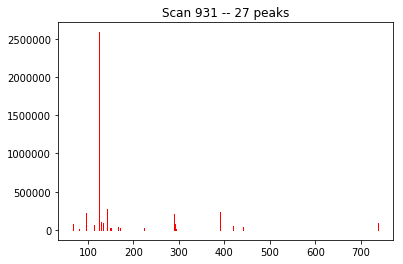

67.87373554414415 76038.80384949871
79.8222061278794 9106.400211362241
94.77453950661526 219188.99206820162
96.49102874383419 25881.800704241814
112.31114428134764 61262.524408501
124.46726489354093 11826.899195289727
124.50020745747281 109888.11445706441
125.06122919252132 2584884.759536256
128.46737367100377 103997.39764183578
129.06340421829248 6602.910225770394
131.5669919400028 2455.019359107003
132.30837137552746 84122.29669621593
142.83603325883124 268772.2966868489
149.12791438136065 26230.1736022726
151.30717224275338 28209.818892733987
155.39475234232438 3165.1179756636716
166.37201126736224 37096.118787634296
170.06640003001112 29833.3922442078
223.2656901416862 28366.021150691933
288.2926569797076 6375.035516775817
288.75818562386087 214553.29985492543
291.92051003592877 72804.25478405114
293.3871166301549 6735.173426362702
389.7806390927967 229085.1717992721
418.12918960904034 56474.27660359304
441.34703121909047 43842.89826916668
737.5624400290998 90150.02034855477


In [26]:
def plot_scan(scan):
    plt.figure()
    for i in range(scan.num_peaks):
        x1 = scan.mzs[i]
        x2 = scan.mzs[i]
        y1 = 0
        y2 = scan.intensities[i]
        a=[[x1,y1],[x2,y2]]
        plt.plot(*zip(*a), marker='', color='r', ls='-', lw=1)
    plt.title('Scan {0} -- {1} peaks'.format(scan.scan_id, scan.num_peaks))
    plt.show()    

mass_spec = IndependentMassSpectrometer(column, scan_times, scan_levels, isolation_windows)
for scan in mass_spec:
    if scan.num_peaks > 25:
        plot_scan(scan)
        for mz, intensity in zip(scan.mzs, scan.intensities):
            print(mz, intensity)

### Generates Synthetic data

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

In [ ]:
# chrom = FunctionalChromatogram("normal", [0,1])
# formula = Formula("hg",100)
# isotopes = Isotopes(formula,[0.8,0.2],["Mono","1C13"])
# aducts = Aducts(formula,["M+H","M+ACN"],[0.9,0.1])
# chem = KnownChemical(formula,isotopes,aducts,100, 10000, chrom, None)
# print(chem.formula)
# print(chem.isotopes)
# print(chem.aducts)